In [12]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# %pip install kaggle
# %pip install kagglehub
import kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)
# !kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Path to dataset files: /Users/imdesigns/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


In [17]:
def get_class_paths(path):
    classes = []
    class_paths = []

    for label in os.listdir(path):
        label_path = os.path.join(path, label)

        if os.path.isdir(label_path):
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)
                classes.append(label)
                class_paths.append(image_path)

    df = pd.DataFrame({"Class Path": class_paths, "Class": classes})

    return df

In [18]:
tr_df = get_class_paths("Training")

In [6]:
tr_df

,Class Path,Class
0,Training/pituitary/Tr-pi_0505.jpg,pituitary
1,Training/pituitary/Tr-pi_0263.jpg,pituitary
2,Training/pituitary/Tr-pi_0277.jpg,pituitary
3,Training/pituitary/Tr-pi_1169.jpg,pituitary
4,Training/pituitary/Tr-pi_0511.jpg,pituitary
...,...,...
5707,Training/meningioma/Tr-me_1053.jpg,meningioma
5708,Training/meningioma/Tr-me_0403.jpg,meningioma
5709,Training/meningioma/Tr-me_0365.jpg,meningioma
5710,Training/meningioma/Tr-me_0371.jpg,meningioma


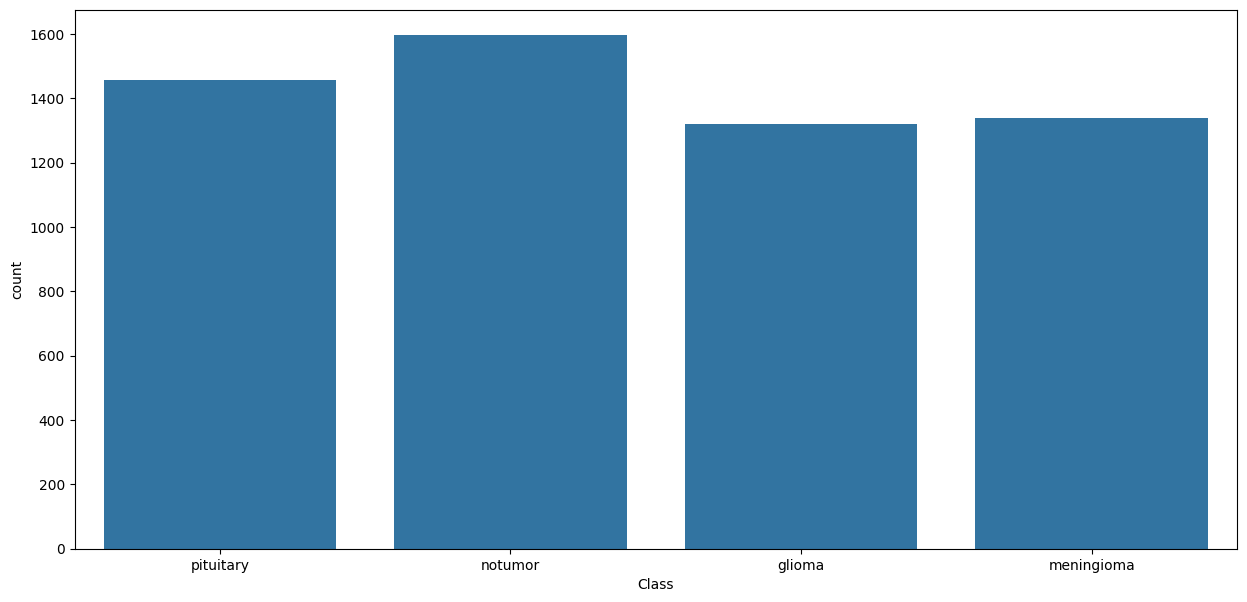

In [19]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x="Class")

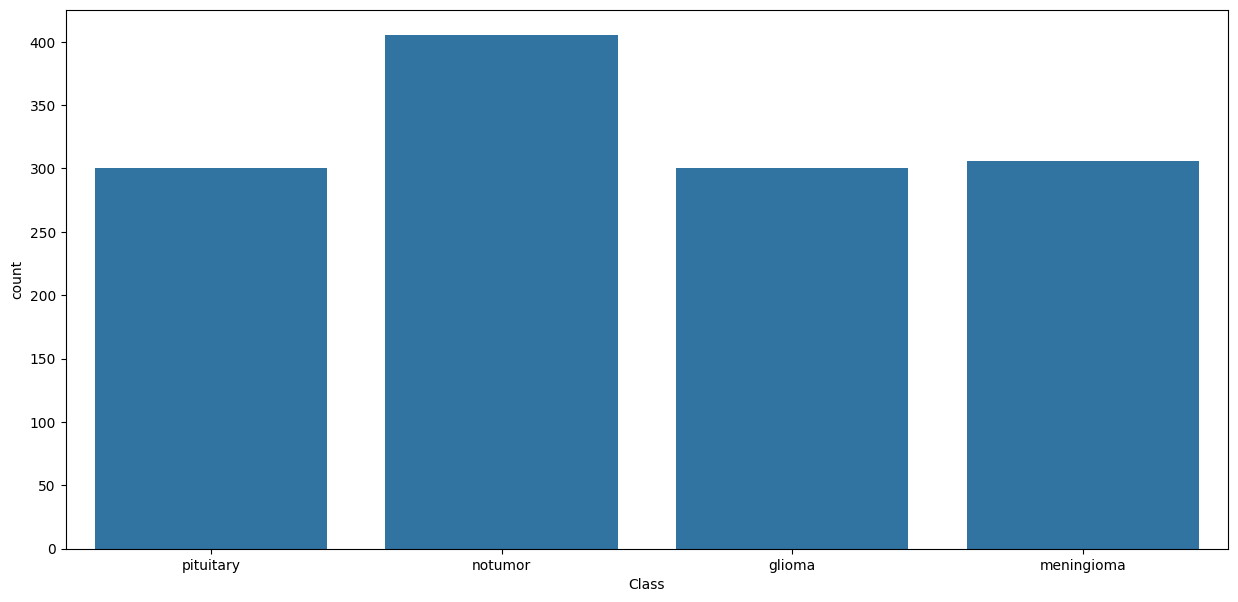

In [20]:
ts_df = get_class_paths("Testing")

plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, x="Class")

In [21]:
# !pip install tensorflow
# !pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
valid_df, test_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df["Class"])

In [23]:
valid_df

,Class Path,Class
913,Testing/glioma/Te-gl_0202.jpg,glioma
807,Testing/glioma/Te-gl_0146.jpg,glioma
1214,Testing/meningioma/Te-me_0168.jpg,meningioma
1050,Testing/meningioma/Te-me_0048.jpg,meningioma
398,Testing/notumor/Te-no_0281.jpg,notumor
...,...,...
938,Testing/glioma/Te-gl_0138.jpg,glioma
748,Testing/glioma/Te-gl_0279.jpg,glioma
653,Testing/notumor/Te-no_0258.jpg,notumor
307,Testing/notumor/Te-no_0290.jpg,notumor


In [24]:
ts_df

,Class Path,Class
0,Testing/pituitary/Te-pi_0233.jpg,pituitary
1,Testing/pituitary/Te-pi_0227.jpg,pituitary
2,Testing/pituitary/Te-pi_0019.jpg,pituitary
3,Testing/pituitary/Te-pi_0031.jpg,pituitary
4,Testing/pituitary/Te-pi_0025.jpg,pituitary
...,...,...
1306,Testing/meningioma/Te-me_0080.jpg,meningioma
1307,Testing/meningioma/Te-me_0094.jpg,meningioma
1308,Testing/meningioma/Te-me_0137.jpg,meningioma
1309,Testing/meningioma/Te-me_0123.jpg,meningioma


In [27]:
batch_size = 32

image_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1./255, brightness_range=[0.8, 1.2], zoom_range=[0.8, 1.2], horizontal_flip=True, vertical_flip=True)

ts_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col="Class Path", y_col="Class", target_size=image_size, batch_size=batch_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col="Class Path", y_col="Class", target_size=image_size, batch_size=batch_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col="Class Path", y_col="Class", target_size=image_size, batch_size=16, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
